### Importing Libraries


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from scipy.stats import shapiro, levene, mannwhitneyu
import warnings
warnings.simplefilter(action='ignore')

### Loading Data


In [5]:
data = pd.read_csv(r'..\data\cookie_cats.csv')

In [7]:
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


### Descriptive Statistics


In [8]:
# Number of unique player
print('Number of Unique Players:', data["userid"].nunique())

Number of Unique Players: 90189


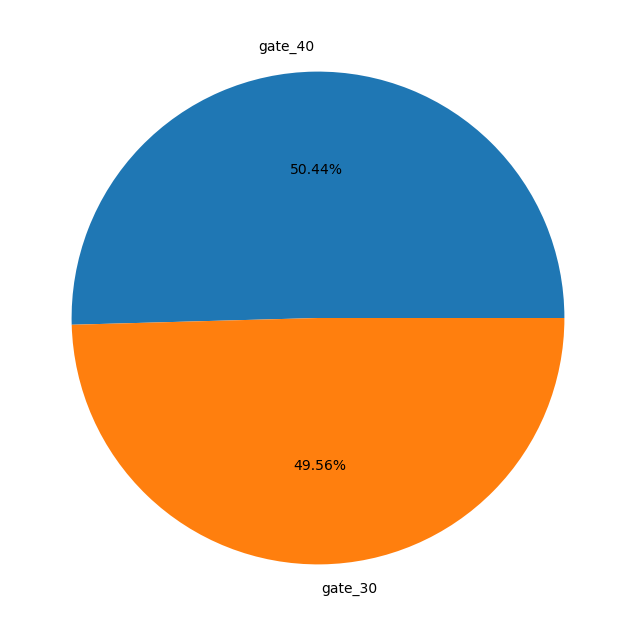

 
OBSERVATION: The number of players in each version is very balanced the data is not very skewed.



In [11]:
# Percentage of players in each version
plt.figure(figsize=(12, 8))
plt.pie(x=data['version'].value_counts().values,
        labels=data['version'].value_counts().index, autopct='%.2f%%')
plt.show()


print(''' 
OBSERVATION: The number of players in each version is very balanced the data is not very skewed.
''')

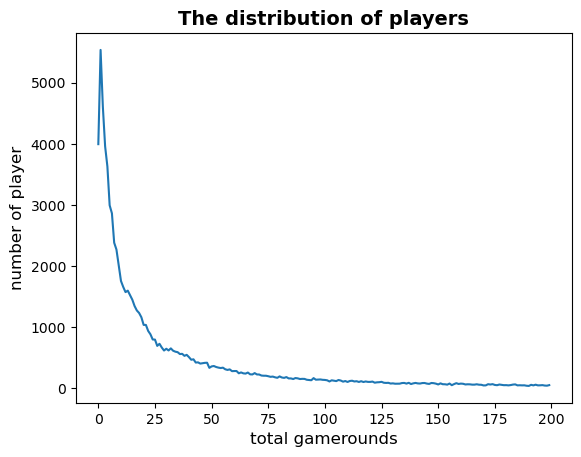

 
    OBSERVATION: In the above plot we can see that some players install the game but then never play it (0 game rounds)
      


In [18]:
# Plotting the distribution of players that played 0 to 200 game rounds
ax = data.groupby("sum_gamerounds")["userid"].count().head(200).plot()
plt.title("The distribution of players", fontweight="bold", size=14)
plt.xlabel("total gamerounds", size=12)
plt.ylabel("number of player", size=12)
plt.show()


print(''' 
    OBSERVATION: In the above plot we can see that some players install the game but then never play it (0 game rounds)
      ''')

In [14]:
# Percentage of Players Never Playing the game
print(
    f'The percentage of Players installing the game and never playing it is {round(len(data[data.sum_gamerounds == 0]) / len(data) , 4) * 100}%')

The percentage of Players installing the game and never playing it is 4.43%


In [45]:
#Number of game rounds played by player for each version
data.groupby("version").agg({"sum_gamerounds" : ["mean","max","count"]})

sum_gamerounds              
                  mean    max  count
version                             
gate_30      52.456264  49854  44700
gate_40      51.298776   2640  45489

### A/B Testing

Hypothesis

μ1=gate is at level 30

μ2=gate is at level 40

HO -> The μ1=μ2 (No statistical significance)

H1 -> The μ1!=μ2 (statistical significance)


Assumptions Control

        i.Normal Distribution
        H0 : The assumption of normal distribution is provided.
        H1 : The assumption of normal distribution is not provided.
        p-value < 0.05 => H0 -> Reject
        p-value > 0.05 => H0 -> Cannot Reject

In [71]:
# gate30 
test_stat, pvalue = shapiro(data.loc[data["version"] == "gate_30", "sum_gamerounds"])
print("Test Stat = %.4f, p-value = %.4f" % (test_stat, pvalue))

Test Stat = 0.0881, p-value = 0.0000


In [72]:
# gate40
test_stat, pvalue = shapiro(data.loc[data["version"] == "gate_40", "sum_gamerounds"])
print("Test Stat = %.4f, p-value = %.4f" % (test_stat, pvalue))

Test Stat = 0.4826, p-value = 0.0000


In both cases, p-value = 0. The normality assumption was rejected because it was less than 0.05.

        ii.Variance Homogeneity Assumption
        H0 : The variance is homogeneous.
        H1 : The variance is not homogeneous.
        p-value < 0.05 => H0 -> Reject
        p-value > 0.05 => H0 -> Cannot Reject

In [73]:
test_stat, pvalue = levene(data.loc[data["version"] == "gate_30", "sum_gamerounds"],
                            data.loc[data["version"] == "gate_40", "sum_gamerounds"])
print("Test Stat = %.4f, p-value = %.4f" % (test_stat, pvalue))

Test Stat = 0.5292, p-value = 0.4669


H0 cannot be rejected because the p-value is greater than 0.05. 

If the normality assumption is rejected for the A/B test, but the variance homogeneity assumption is satisfied, then it is recommended to use non-parametric test methods. 

In [74]:
test_stat, pvalue = mannwhitneyu(data.loc[data["version"] == "gate_30", "sum_gamerounds"],
                            data.loc[data["version"] == "gate_40", "sum_gamerounds"])
print("Test Stat = %.4f, p-value = %.4f" % (test_stat, pvalue))

Test Stat = 1024331250.5000, p-value = 0.0502


#### Result

H0 cannot be rejected because the p-value is greater than 0.05

There is no statistically significant difference between 'gate30' and 'gate40' with 95% confidence

Now, we may look to other factors like how to postion of the gate effect retention, that is, is there any statistical significance in retention based on the gates position

### A/B Testing on Retention


In [32]:
# Percentage of Retention for the 1st day and the 7th day after installing the game
df_retention = data[["retention_1", "retention_7"]].mean()*100
print(
    f"1-day retention ratio: {round(df_retention[0],2)}%\n7-days retention ratio: {round(df_retention[1],2)}%")


print('''
OBSERVATION: A little less than half of the players come back one day after installing the game. 
             18% of the players come back 7 day after installing the game.
      ''')

1-day retention ratio: 44.52%
7-days retention ratio: 18.61%

OBSERVATION: A little less than half of the players come back one day after installing the game. 
             18% of the players come back 7 day after installing the game.
      


In [66]:
# Calculating 1-day and 7-days retention for each A/B group
df_retention_ab = data.groupby("version").agg(
    {"userid": "count", "retention_1": "mean", "retention_7": "mean", "sum_gamerounds": "sum"})
print(df_retention_ab)
print(''' 
OBSERVATION: 1.There was a slight decrease in 1-day retention when the gate was moved to level 40 (44.2%) compared 
               to the control group when it was at level 30 (44.8%).
             2.A decrease in 7-day retention when the gate was moved to level 40 (18.2%) compared to the control 
               group when it was at level 30 (19.8%).
''')

         userid  retention_1  retention_7  sum_gamerounds
version                                                  
gate_30   44700     0.448188     0.190201         2344795
gate_40   45489     0.442283     0.182000         2333530
 
OBSERVATION: 1.There was a slight decrease in 1-day retention when the gate was moved to level 40 (44.2%) compared 
               to the control group when it was at level 30 (44.8%).
             2.A decrease in 7-day retention when the gate was moved to level 40 (18.2%) compared to the control 
               group when it was at level 30 (19.8%).



#### 1. A/B Testing Using Hypothesis

Hypothesis

μ1=retention when gate is at level 30

μ2=retention when gate is at level 40

HO -> The μ1=μ2 (No statstical significance)

H1 -> The μ1!=μ2 (statstical significance)


In [52]:
control = data[data['version'] == 'gate_30'].copy()

control.retention_1 = control.retention_1.replace({True: 1, False: 0})
control.retention_7 = control.retention_7.replace({True: 1, False: 0})

In [58]:
experimental = data[data['version'] == 'gate_40'].copy()

experimental.retention_1 = experimental.retention_1.replace({True: 1, False: 0})
experimental.retention_7 = experimental.retention_7.replace({True: 1, False: 0})

In [59]:
def AB_testing(x1 , x2 ):
    x_bar1 = np.mean(x1)
    var1 = np.var(x1)
    n1 = len(x1)
    
    x_bar2 = np.mean(x2)
    var2 = np.var(x2)
    n2 = len(x2)
    
    z_score = (x_bar1 - x_bar2) / np.sqrt((var1 / n1) + (var2 / n2))
    p_value = st.norm.cdf(z_score)
    if z_score > 0:
        p_value = 2*(1 - p_value)
    else:
        p_value = 2 * p_value
    return print(f'z-score : {z_score} , p-value : {p_value}')

In [60]:
AB_testing(control['retention_7'] , experimental['retention_7'])

z-score : 3.1640640401484066 , p-value : 0.0015558255737109228


There is sufficient evidence to declare a difference in the average 7 days retention for the two groups, As the p-value is less than alpha = 0.05 we can reject the null hypothesis at the level of 7 days retention.

In [61]:
AB_testing(control['retention_1'] , experimental['retention_1'])

z-score : 1.7840972718295067 , p-value : 0.07440786052354165


Here we can not reject the null hypothese at the level of 1 days retention

#### Result

Percentage of returning players of control group after 7 day is 19.0%, whereas Percentage of returning players of experimental group is 18.2%

Movement of gate to the 40th level affects negatively on numbers of returning players after 7 days

Z-test above confirms that the changes were significant

#### 2.A/B Testing using Bootsrapping

In [39]:
# Creating an list with bootstrapped means for each A/B group
boot_1d = []
boot_7d = []
for i in range(10000):
    boot_mean_1 = data.sample(frac=1, replace=True).groupby('version')['retention_1'].mean()
    boot_mean_7 = data.sample(frac=1, replace=True).groupby('version')['retention_7'].mean()
    boot_1d.append(boot_mean_1)
    boot_7d.append(boot_mean_7)

In [40]:
# Transforming the list to a DataFrame
boot_1d = pd.DataFrame(boot_1d)
boot_7d = pd.DataFrame(boot_7d)

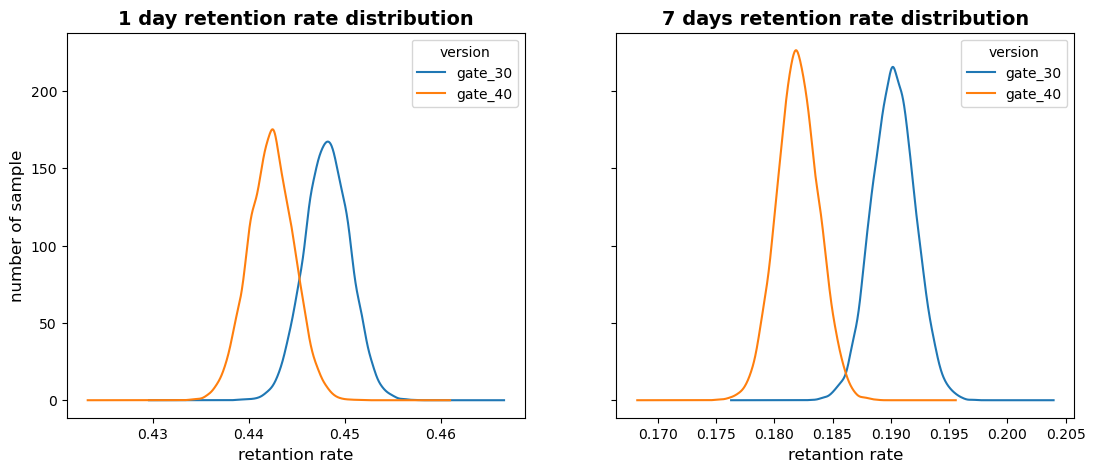


      OBSERVATION: These two distributions above represent the bootstrap uncertainty over what the 
                   underlying 1-day & 7-days retention could be for the two A/B groups. 



In [46]:
# Kernel Density Estimate plot of the bootstrap distributions
fig, (ax1,ax2) = plt.subplots(1, 2, sharey=True, figsize=(13,5))
boot_1d.plot.kde(ax=ax1)
ax1.set_xlabel("retantion rate",size=12)
ax1.set_ylabel("number of sample",size=12)
ax1.set_title("1 day retention rate distribution", fontweight="bold",size=14)

boot_7d.plot.kde(ax=ax2)
ax2.set_xlabel("retantion rate",size=12)
ax2.set_title("7 days retention rate distribution", fontweight="bold",size=14)
plt.show()

print('''
      OBSERVATION: These two distributions above represent the bootstrap uncertainty over what the 
                   underlying 1-day & 7-days retention could be for the two A/B groups. 
''')

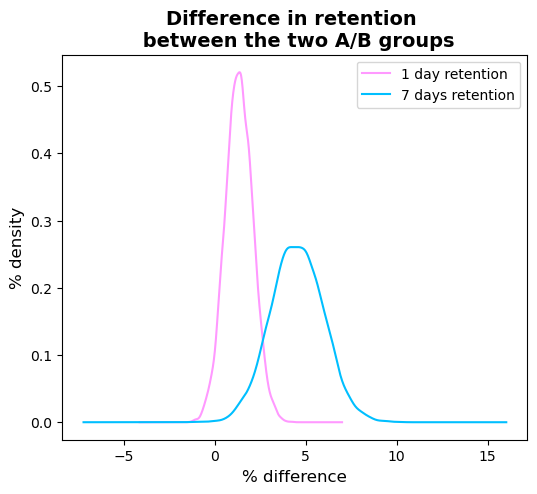


    OBSERVATION:From these chart, we can see that the most likely % difference is around 1% - 2% for 1-day retention. 
                For 7-days retention the most likely % difference is around 2% - 5%. Moreover, the most of the distribution is above 0%, 
                in favor of a gate at level 30     



In [62]:
# Adding a column with the % difference between the two A/B groups
boot_1d['diff'] = ((boot_1d['gate_30'] - boot_1d['gate_40']) / boot_1d['gate_40'] * 100)
boot_7d['diff'] = ((boot_7d['gate_30'] - boot_7d['gate_40']) / boot_7d['gate_40'] * 100)

# Ploting the bootstrap % difference
fig, (ax1) = plt.subplots(1, 1,figsize=(6,5))

boot_1d['diff'].plot.kde(ax=ax1, c="#ff99ff", label = "1 day retention")
boot_7d['diff'].plot.kde(ax=ax1, c= "#00bfff", label = "7 days retention")
ax1.set_xlabel("% difference",size=12)
ax1.set_ylabel("% density",size=12)
ax1.set_title("Difference in retention \n between the two A/B groups", fontweight="bold", size=14)
plt.legend()
plt.show()

print('''
    OBSERVATION:From these chart, we can see that the most likely % difference is around 1% - 2% for 1-day retention. 
                For 7-days retention the most likely % difference is around 2% - 5%. Moreover, the most of the distribution is above 0%, 
                in favor of a gate at level 30     
''')

In [49]:
# Calculating the probability that 1-day retention is greater when the gate is at level 30
prob_1 = (boot_1d['diff']>0).sum()/len(boot_1d['diff'])

# Calculating the probability that 7-days retention is greater when the gate is at level 30
prob_7 = (boot_7d['diff']>0).sum()/len(boot_7d['diff'])

# Pretty printing the probability
print(f"The probability that 1-day retention is greater when the gate is at level 30: {round(prob_1,2)*100}% \
      \nThe probability that 7-days retention is greater when the gate is at level 30: {(prob_7)*100}% ")

The probability that 1-day retention is greater when the gate is at level 30: 96.0%       
The probability that 7-days retention is greater when the gate is at level 30: 99.89% 


##### Result

The bootstrap result tells us that there is strong evidence 99.8% probability that 7-day retention is higher when the gate is at level 30 than when it is at level 40.